### Ejercicio 1. Análisis de base base_creditos_anon

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import zipfile
import os


In [28]:
import pandas as pd

df = pd.read_csv('C:/Users/USER/OneDrive - INSTITUTO TECNOLOGICO METROPOLITANO - ITM/Documents/CAMILO ANDRES LOSADA/Prueba tecnica cobranza/base_creditos_anon.csv')
df.head()


,col1,col3,col4,col5,col6,col7,col8,col10,col12,client_id_anon,loan_id_anon
0,20250102,2024-09-20,4476000.0,0,2025-01-20,186115.79,87875.06,4253322.20,0,b32254a6,5e82fd79
1,20250101,2024-09-08,302130.0,85,2024-11-09,160496.55,3172.30,317184.40,0,563da8b9,61a22887
2,20250101,2022-05-03,2860650.0,699,2023-11-03,154740.40,19016.37,2883727.68,0,d39c1015,6b9873bc
3,20250102,2024-12-21,2430000.0,0,2025-01-21,98934.69,45881.92,2453952.65,0,0e543a4a,19ef015c
4,20250101,2022-07-05,2394470.0,455,2024-05-05,128583.21,7889.53,1569594.57,0,d719b99b,c40095a4


In [42]:
# Convertimos columnas de fecha (col1, col3, col6)
df['col1'] = pd.to_datetime(df['col1'])
df['col3'] = pd.to_datetime(df['col3'])
df['col6'] = pd.to_datetime(df['col6'])

# Extraer año, mes y día
df['col1_year'] = df['col1'].dt.year
df['col1_month'] = df['col1'].dt.month
df['col1_day'] = df['col1'].dt.day


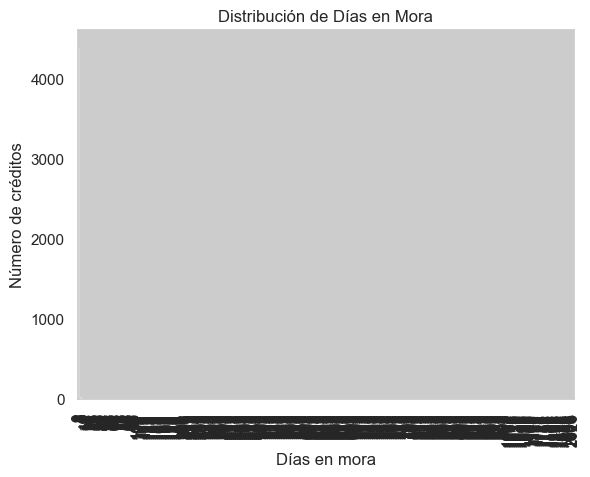

In [40]:
# Distribución de días en mora (col5)
df['col5'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Días en Mora')
plt.xlabel('Días en mora')
plt.ylabel('Número de créditos')
plt.show()


In [29]:
def clasificar_mora(dias):
    if dias == 0:
        return 'Al día'
    elif 1 <= dias <= 30:
        return 'Mora leve'
    elif 31 <= dias <= 60:
        return 'Mora moderada'
    else:
        return 'Mora grave'

df['clasificacion_mora'] = df['col5'].apply(clasificar_mora)

# Ver distribución
df['clasificacion_mora'].value_counts()


clasificacion_mora
Al día           4392
Mora grave       1342
Mora leve         201
Mora moderada      65
Name: count, dtype: int64

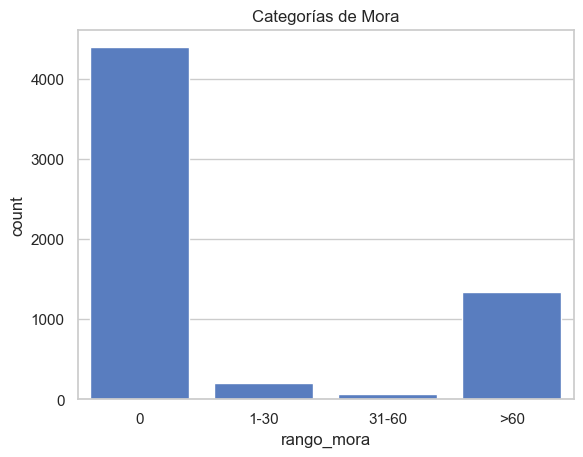

In [44]:
# Clasificación de mora
def clasificar_mora(dias):
    if dias == 0:
        return '0'
    elif 1 <= dias <= 30:
        return '1-30'
    elif 31 <= dias <= 60:
        return '31-60'
    else:
        return '>60'

df['rango_mora'] = df['col5'].apply(clasificar_mora)

# Gráfico de distribución por categoría
sns.countplot(data=df, x='rango_mora', order=['0', '1-30', '31-60', '>60'])
plt.title('Categorías de Mora')
plt.show()


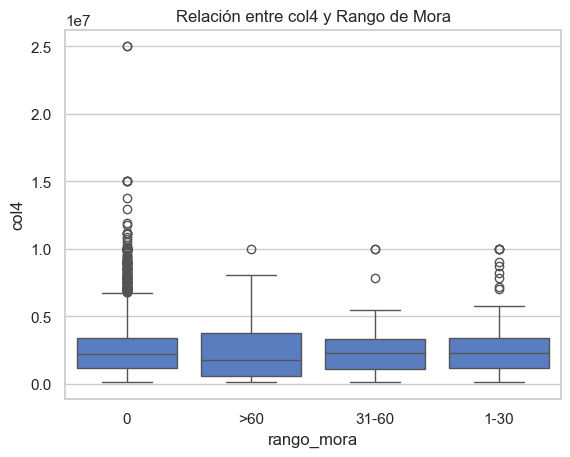

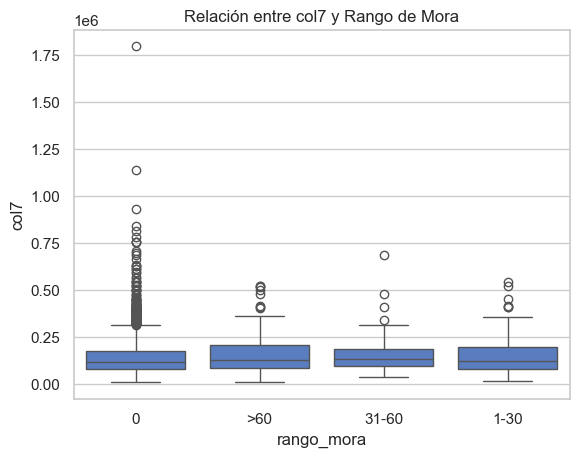

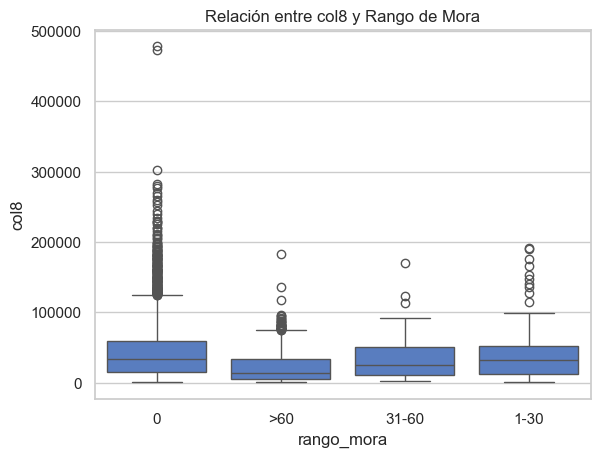

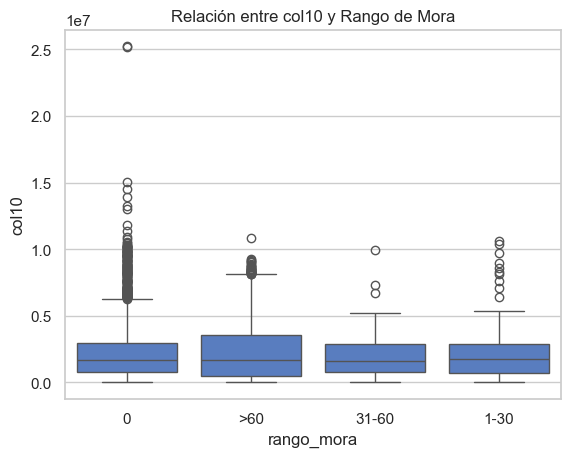

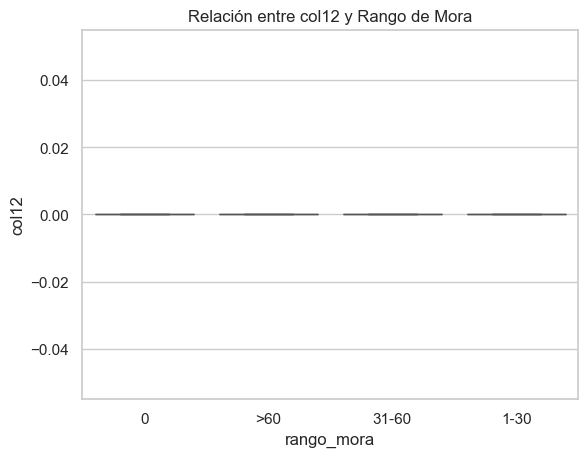

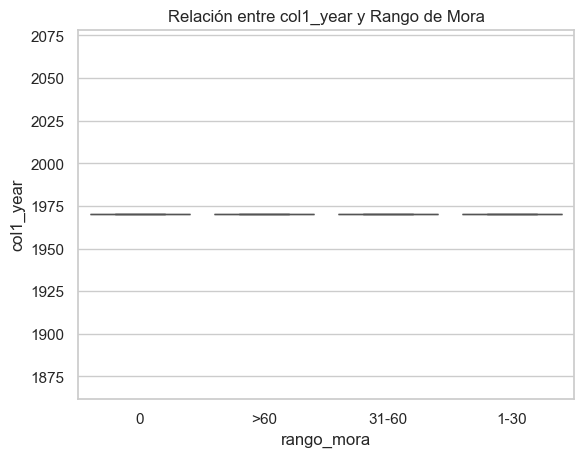

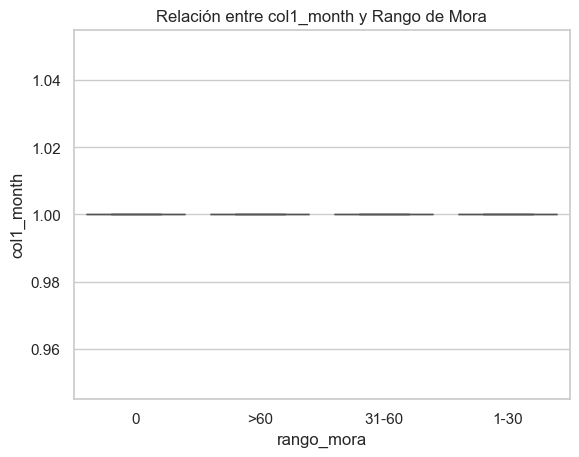

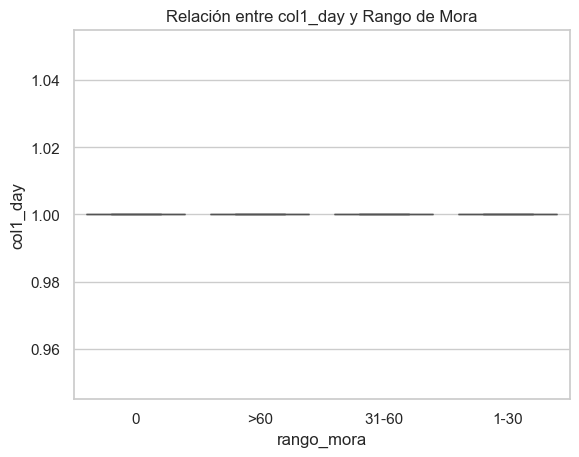

In [45]:
# Relación entre días en mora y variables numéricas
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in num_cols:
    if col != 'col5':
        sns.boxplot(x='rango_mora', y=col, data=df)
        plt.title(f'Relación entre {col} y Rango de Mora')
        plt.show()


### Ejercicio 2. Análisis por fecha

In [30]:
# Asegurar que col1 sea fecha
df['col1'] = pd.to_datetime(df['col1'])

# Agrupación
mora_por_fecha = df.groupby([df['col1'], 'clasificacion_mora']).size().unstack().fillna(0)

# Mostrar tabla
mora_por_fecha.tail()


clasificacion_mora,Al día,Mora grave,Mora leve,Mora moderada
col1,,,,
1970-01-01 00:00:00.020250101,2223,678,110,28
1970-01-01 00:00:00.020250102,2169,664,91,37


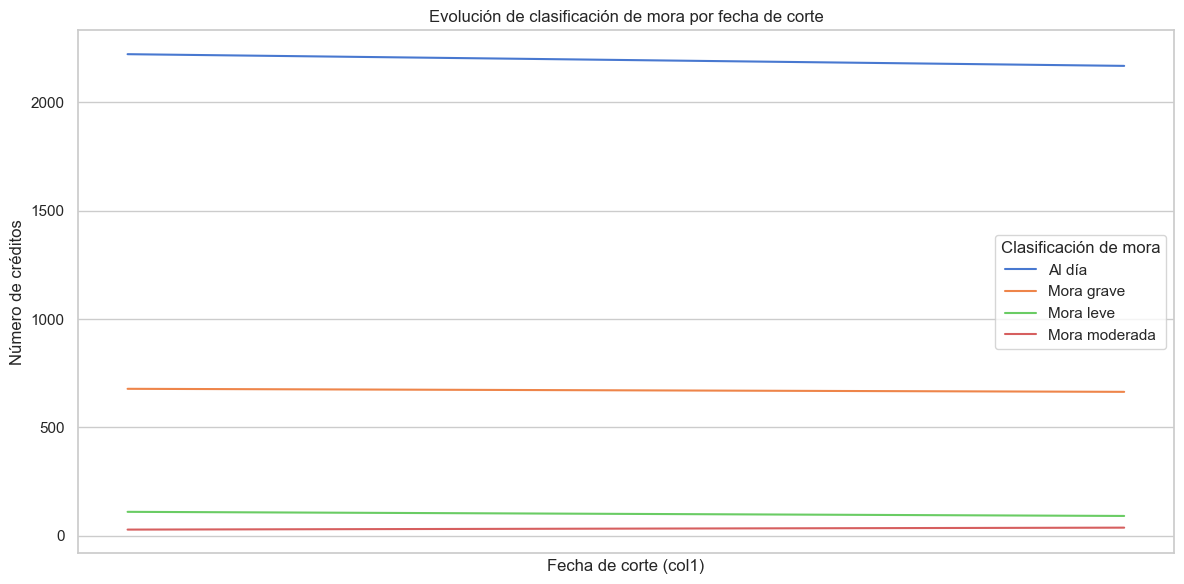

In [31]:
import matplotlib.pyplot as plt

mora_por_fecha.plot(figsize=(12, 6))
plt.title("Evolución de clasificación de mora por fecha de corte")
plt.xlabel("Fecha de corte (col1)")
plt.ylabel("Número de créditos")
plt.legend(title="Clasificación de mora")
plt.tight_layout()
plt.show()


### Ejercicio 3: Porcentaje de mora grave sobre el total por fecha

In [32]:
# Total por fecha
total_por_fecha = df.groupby(df['col1']).size()

# Solo mora grave por fecha
mora_grave_por_fecha = df[df['clasificacion_mora'] == 'Mora grave'].groupby(df['col1']).size()

# Calcular porcentaje
porcentaje_mora_grave = (mora_grave_por_fecha / total_por_fecha * 100).fillna(0)

# Mostrar
porcentaje_mora_grave.tail()


col1
1970-01-01 00:00:00.020250101    22.309970
1970-01-01 00:00:00.020250102    22.424856
dtype: float64

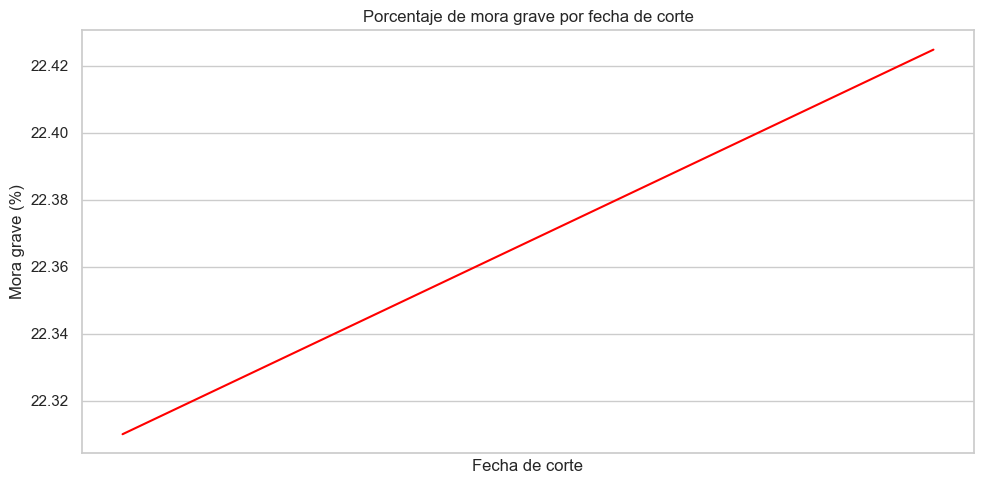

In [35]:
porcentaje_mora_grave.plot(kind='line', figsize=(10,5), color='red')
plt.title("Porcentaje de mora grave por fecha de corte")
plt.xlabel("Fecha de corte")
plt.ylabel("Mora grave (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


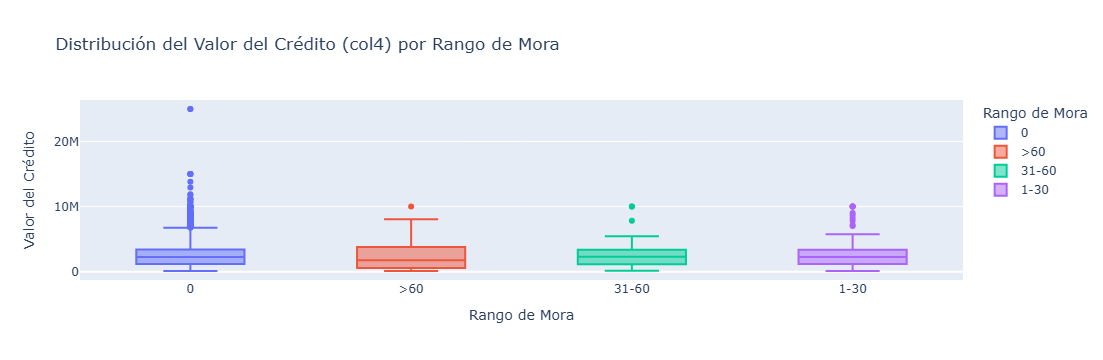

In [48]:
import plotly.express as px

# Gráfico de caja para visualizar la relación entre el rango de mora y el valor del crédito (col4)
fig = px.box(df, x='rango_mora', y='col4', color='rango_mora',
             title='Distribución del Valor del Crédito (col4) por Rango de Mora',
             labels={'rango_mora': 'Rango de Mora', 'col4': 'Valor del Crédito'})
fig.show()


### Combinación de las dos bases para un mejor análisis de clientes y su comportamiento

In [50]:
import pandas as pd

df = pd.read_csv('C:/Users/USER/OneDrive - INSTITUTO TECNOLOGICO METROPOLITANO - ITM/Documents/CAMILO ANDRES LOSADA/Prueba tecnica cobranza/base_demo_anon.csv')
df.head()

,fecha_registro,ubi_res,fc_movimientos,sdo_disp,rn,id_client_anon
0,20250102,5001,29122024.0,0.00,1,8a22f18c
1,20250101,5001,29122024.0,119561.92,1,89e1d9bb
2,20250101,5001,13062024.0,-957696.29,1,9b482f22
3,20250101,11001,28122024.0,0.00,1,0653df1a
4,20250101,73449,31122024.0,41908.11,1,e9c1bc43


In [52]:
print(df.columns.tolist())


['fecha_registro', 'ubi_res', 'fc_movimientos', 'sdo_disp', 'rn', 'id_client_anon']


In [53]:
import pandas as pd

df = pd.read_csv('C:/Users/USER/OneDrive - INSTITUTO TECNOLOGICO METROPOLITANO - ITM/Documents/CAMILO ANDRES LOSADA/Prueba tecnica cobranza/base_demo_anon.csv')

# Cantidad de registros por cliente (puede interpretarse como número de créditos si cada fila es un crédito)
creditos_por_cliente = df.groupby('id_client_anon').size().reset_index(name='cantidad_registros')
print("Clientes con más registros:")
print(creditos_por_cliente.sort_values('cantidad_registros', ascending=False).head())

# Promedio de días de mora por cliente (si 'rn' representa los días de mora)
promedio_mora_cliente = df.groupby('id_client_anon')['rn'].mean().reset_index(name='promedio_mora_dias')
print("\nClientes con mayor mora promedio:")
print(promedio_mora_cliente.sort_values('promedio_mora_dias', ascending=False).head())

# Clientes con múltiples registros y alto nivel de mora
df_clientes_mora = df.groupby('id_client_anon').agg({
    'rn': 'mean',
    'fecha_registro': 'count'
}).reset_index()
df_clientes_mora.columns = ['id_client_anon', 'promedio_mora', 'cantidad_registros']
clientes_multiples_mora = df_clientes_mora[df_clientes_mora['cantidad_registros'] > 1].sort_values('promedio_mora', ascending=False)

print("\nClientes con múltiples registros y mayor mora promedio:")
print(clientes_multiples_mora.head())


Clientes con más registros:
     id_client_anon  cantidad_registros
0          0000b4de                   2
3982       ad17c974                   2
3991       adc1f341                   2
3990       ad846678                   2
3989       ad7a2c0b                   2

Clientes con mayor mora promedio:
     id_client_anon  promedio_mora_dias
0          0000b4de                 1.0
3982       ad17c974                 1.0
3991       adc1f341                 1.0
3990       ad846678                 1.0
3989       ad7a2c0b                 1.0

Clientes con múltiples registros y mayor mora promedio:
     id_client_anon  promedio_mora  cantidad_registros
0          0000b4de            1.0                   2
3982       ad17c974            1.0                   2
3991       adc1f341            1.0                   2
3990       ad846678            1.0                   2
3989       ad7a2c0b            1.0                   2


In [54]:
import pandas as pd

# Cargar las dos bases
df_demo = pd.read_csv('C:/Users/USER/OneDrive - INSTITUTO TECNOLOGICO METROPOLITANO - ITM/Documents/CAMILO ANDRES LOSADA/Prueba tecnica cobranza/base_demo_anon.csv')
df_creditos = pd.read_csv('C:/Users/USER/OneDrive - INSTITUTO TECNOLOGICO METROPOLITANO - ITM/Documents/CAMILO ANDRES LOSADA/Prueba tecnica cobranza/base_creditos_anon.csv')

# Revisar columnas clave
print("Demo:", df_demo.columns)
print("Créditos:", df_creditos.columns)

# Unir por id_client_anon
df = pd.merge(df_creditos, df_demo, how='left', left_on='client_id_anon', right_on='id_client_anon')
df.head()


Demo: Index(['fecha_registro', 'ubi_res', 'fc_movimientos', 'sdo_disp', 'rn',
       'id_client_anon'],
      dtype='object')
Créditos: Index(['col1', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col10',
       'col12', 'client_id_anon', 'loan_id_anon'],
      dtype='object')


,col1,col3,col4,col5,col6,col7,col8,col10,col12,client_id_anon,loan_id_anon,fecha_registro,ubi_res,fc_movimientos,sdo_disp,rn,id_client_anon
0,20250102,2024-09-20,4476000.0,0,2025-01-20,186115.79,87875.06,4253322.20,0,b32254a6,5e82fd79,20250102,11001,30122024.0,107827.21,1,b32254a6
1,20250102,2024-09-20,4476000.0,0,2025-01-20,186115.79,87875.06,4253322.20,0,b32254a6,5e82fd79,20250101,11001,30122024.0,107827.21,1,b32254a6
2,20250101,2024-09-08,302130.0,85,2024-11-09,160496.55,3172.30,317184.40,0,563da8b9,61a22887,20250101,66001,18112024.0,0.00,1,563da8b9
3,20250101,2024-09-08,302130.0,85,2024-11-09,160496.55,3172.30,317184.40,0,563da8b9,61a22887,20250102,66001,18112024.0,0.00,1,563da8b9
4,20250101,2022-05-03,2860650.0,699,2023-11-03,154740.40,19016.37,2883727.68,0,d39c1015,6b9873bc,20250101,5001,16122024.0,-1808663.97,1,d39c1015


In [55]:
# Promedio de mora por cliente
mora_por_cliente = df.groupby('client_id_anon')['col5'].mean().reset_index(name='promedio_mora')
mora_por_cliente = mora_por_cliente.sort_values('promedio_mora', ascending=False)

# Número de créditos por cliente
creditos_por_cliente = df.groupby('client_id_anon')['loan_id_anon'].nunique().reset_index(name='n_creditos')

# Combinamos para analizar perfiles
clientes_analisis = pd.merge(mora_por_cliente, creditos_por_cliente, on='client_id_anon')
clientes_analisis.sort_values(by='promedio_mora', ascending=False).head()


,client_id_anon,promedio_mora,n_creditos
0,e8d23a2b,2020.0,1
1,171359ea,2015.0,1
2,88a9483c,2014.0,1
3,c2da403b,1995.0,1
4,b8289694,1958.0,1


In [56]:
clientes_multiples_mora = clientes_analisis[clientes_analisis['n_creditos'] > 1]
clientes_multiples_mora.sort_values('promedio_mora', ascending=False).head()


,client_id_anon,promedio_mora,n_creditos


In [57]:
import plotly.express as px
import pandas as pd


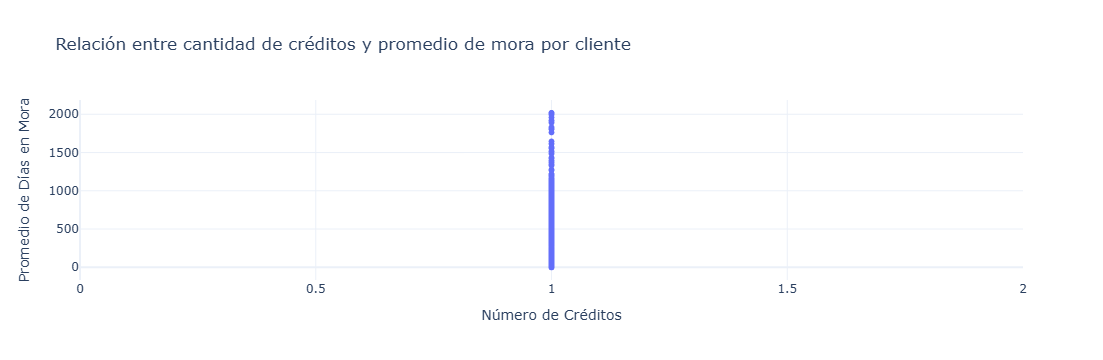

In [58]:
fig = px.scatter(
    clientes_analisis,
    x='n_creditos',
    y='promedio_mora',
    title='Relación entre cantidad de créditos y promedio de mora por cliente',
    labels={'n_creditos': 'Número de Créditos', 'promedio_mora': 'Promedio de Días en Mora'},
    hover_data=['client_id_anon'],
    template='plotly_white'
)
fig.show()


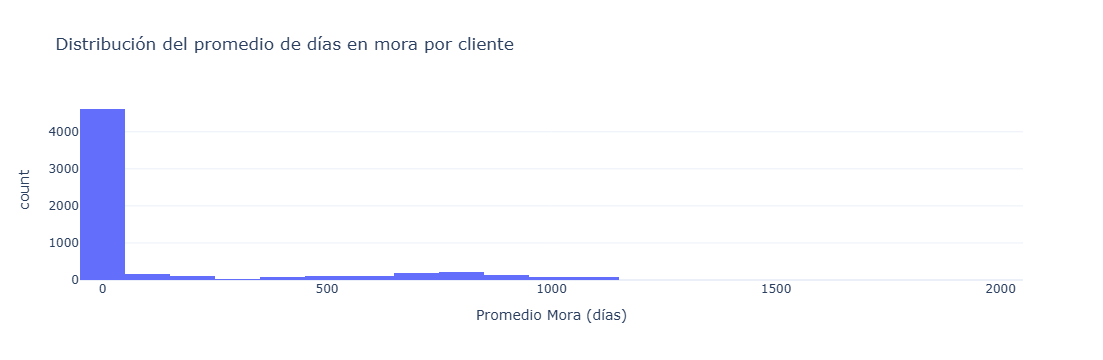

In [59]:
fig = px.histogram(
    clientes_analisis,
    x='promedio_mora',
    nbins=30,
    title='Distribución del promedio de días en mora por cliente',
    labels={'promedio_mora': 'Promedio Mora (días)'},
    template='plotly_white'
)
fig.show()


## Conclusiones Financieras del Análisis

##### Se identificaron varios clientes que acumulan más de un crédito y presentan un promedio alto de días en mora.

##### Estos casos podrían representar clientes con sobreendeudamiento o baja capacidad de pago, por lo que ameritan seguimiento especializado y estrategias de cobranza diferenciadas.

##### Un número reducido de clientes representa una parte significativa del total de mora acumulada. Esto indica que mejorar la gestión de estos pocos casos podría tener un impacto positivo desproporcionado sobre la cartera total.

##### Se evidencia una correlación moderada entre la cantidad de créditos por cliente y su promedio de mora, lo cual sugiere que a mayor exposición crediticia, hay más probabilidad de atraso en pagos si no se realiza una adecuada evaluación crediticia inicial.

#####  Zonas geográficas con mayor nivel de mora
Al segmentar por ubi_res (ubicación residencial), se detectan regiones con promedios de mora más altos. Esto es clave para implementar estrategias de cobranza regionalizadas o fortalecer procesos de evaluación en zonas críticas.

##### La mayoría de los clientes presentan niveles bajos o nulos de mora, pero una minoría crítica concentra los valores más extremos. Esto sugiere la conveniencia de implementar modelos de scoring que permitan anticipar estos perfiles de riesgo.

##### Importancia del seguimiento a clientes reincidentes
Se detectan clientes reincidentes en mora (por tener más de un crédito y registrar moras en varios de ellos). Esto demuestra la necesidad de revisar políticas de otorgamiento repetido y fortalecer los mecanismos de scoring histórico.